In [1]:
import pandas as pd
from patsy import dmatrices
import matplotlib.pyplot as plt
import math as m
import numpy as np
import seaborn as sns
import statsmodels as sm
import statsmodels.api as sma
from statsmodels.compat import lzip
import statsmodels.stats.api as sms
sns.set()

In [2]:
data = pd.read_excel("Data/simulation_results_no_test_delays.xlsx", index_col = 0)
days_simulated = 25

In [3]:
data

,hazard_rate_scale,infection_reporting_prob,contact_tracing_success_prob,contact_trace_delay_par,global_contact_reduction,two_step_tracing,prob_has_trace_app,0,1,2,...,15,16,17,18,19,20,21,22,23,24
0,0.815392,0.5,0.814370,1.828329,0.526473,False,0.376802,5000,5034,5334,...,27489,29252,30938,32623,34274,35855,37392,38936,40433,41831
1,0.815392,0.5,0.700312,2.210773,0.256255,False,0.488790,5000,5092,5542,...,61211,69266,78069,87658,98126,109482,121900,135331,149896,165750
2,0.811619,0.6,0.866266,2.291236,0.768071,False,0.222099,5000,5025,5227,...,13359,13665,13923,14153,14351,14509,14642,14748,14853,14953
3,0.830484,0.1,0.903227,1.789121,0.089129,False,0.003929,5000,5084,5574,...,107546,130338,157191,189487,227258,271585,324383,385870,458454,542860
4,0.804073,0.8,0.775432,1.863735,0.663014,True,0.369741,5000,5044,5322,...,17337,17857,18296,18664,18955,19229,19480,19695,19850,19992
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.811619,0.6,0.827038,1.510402,0.398273,False,0.396969,5000,5067,5468,...,38702,41826,44995,48111,51295,54449,57510,60598,63557,66529
96,0.830484,0.1,0.739063,2.399260,0.243100,True,0.062873,5000,5064,5463,...,71975,84764,99241,116089,135674,158036,184146,213732,248086,287678
97,0.815392,0.5,0.740041,1.762001,0.747524,False,0.289859,5000,5026,5232,...,14870,15314,15687,16015,16299,16572,16793,16971,17155,17310
98,0.826711,0.2,0.811862,2.052342,0.523579,True,0.120711,5000,5058,5372,...,31019,33860,36736,39632,42698,45889,49165,52548,55984,59392


In [4]:
infection_counts = [str(i) for i in range(days_simulated)]
infection_counts = data[infection_counts]

Text(0.5, 1.0, 'Total Infected')

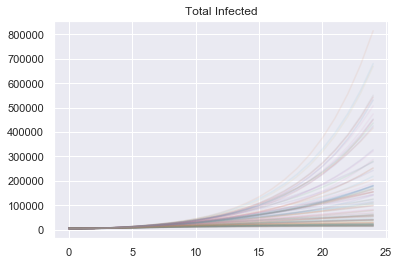

In [5]:
for _ in range(data.shape[0]):
    plt.plot(range(days_simulated), infection_counts.iloc[_], alpha = 0.1)
plt.title("Total Infected")

Text(0.5, 1.0, '$log_2$(Total Infected)')

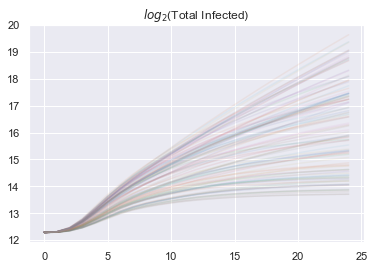

In [6]:
for _ in range(data.shape[0]):
    plt.plot(range(days_simulated), infection_counts.iloc[_].apply(lambda x: np.log2(x)), alpha = 0.1)
plt.title("$log_2$(Total Infected)")

Text(0.5, 1.0, 'Infection Incidence')

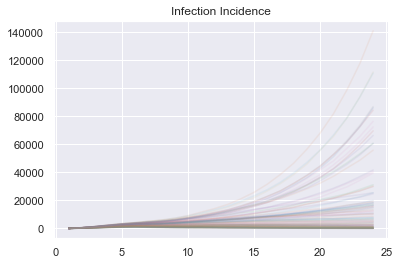

In [7]:
for _ in range(data.shape[0]):
    plt.plot(range(days_simulated), infection_counts.iloc[_].diff(1), alpha = 0.1)
plt.title("Infection Incidence")

Text(0.5, 1.0, 'Infection Incidence (10 epidemics)')

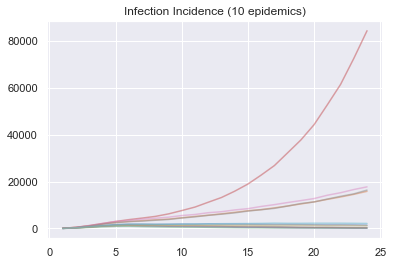

In [8]:
for _ in range(10):
    plt.plot(range(days_simulated), infection_counts.iloc[_].diff(1), alpha = 0.5)
plt.title("Infection Incidence (10 epidemics)")

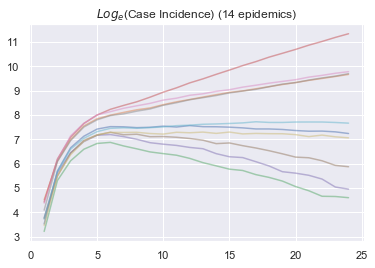

In [9]:
for _ in range(10):
    plt.plot(range(days_simulated), infection_counts.iloc[_].diff(1).apply(lambda x: np.log(x)), alpha = 0.5)
plt.title("$Log_e$(Case Incidence) (14 epidemics)")
plt.savefig("Figures/Log_case_incidence.png")

We can see the variance begins to increase for the exponentially decaying epidemcis as they near 0. In order to get good estimation for the epidemics, we icnrease the starting number of infections. In this experiment, we start with 5000 infected, let the process run for 10 days, and then estimated the growth rate using days 10-30.

In [10]:
log_diff = infection_counts.iloc[_].diff(1).apply(lambda x: np.log(x))

data_set_up = {
    "log_case_incidence": log_diff[10:days_simulated],
    "time": list(range(10, days_simulated))
}
dataframe = pd.DataFrame(data_set_up)

C:\Users\mfyles\Anaconda3\lib\site-packages\scipy\stats\stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  "anyway, n=%i" % int(n))


                            OLS Regression Results                            
Dep. Variable:     log_case_incidence   R-squared:                       0.668
Model:                            OLS   Adj. R-squared:                  0.642
Method:                 Least Squares   F-statistic:                     26.11
Date:                Sat, 09 May 2020   Prob (F-statistic):           0.000200
Time:                        15:57:28   Log-Likelihood:                 28.956
No. Observations:                  15   AIC:                            -53.91
Df Residuals:                      13   BIC:                            -52.50
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.4636      0.040    188.799      0.0

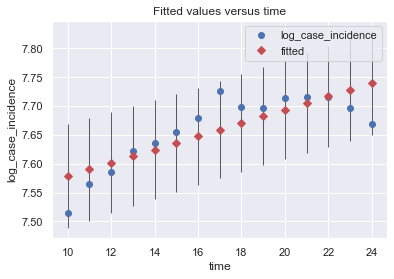

In [11]:
y, X = dmatrices('log_case_incidence ~ time', 
                 data = dataframe)
model = sma.OLS(y, X)
res = model.fit()
print(res.summary())
fig = sm.graphics.regressionplots.plot_fit(res, 1)
print(f"doublign time = {m.log(2)/res.params[1]}")

In [12]:
data_subset = infection_counts

In [13]:
growth_rates = []
for _ in range(data_subset.shape[0]):
    print(f"current fit; {_}", end = "\r")
    
    log_diff = data_subset.iloc[_].diff(1).apply(lambda x: np.log(x))

    data_set_up = {
        "log_case_incidence": log_diff[10:25],
        "time": list(range(10, 25))
    }
    dataframe = pd.DataFrame(data_set_up)
    dataframe = pd.DataFrame(data_set_up)
    
    y, X = dmatrices('log_case_incidence ~ time', 
                     data = dataframe)
    model = sma.RLM(y, X)
    res = model.fit()
    growth_rates.append(res.params[1])

    if res.params[1] == -float("inf"):
        print(f"missing data in line {_}")

In [14]:
x = pd.Series(growth_rates) # 200 values
#x = x[x.between(x.quantile(.05), x.quantile(.95))] # without outliers

Text(0.5, 1.0, 'Distribution of Growth Rates')

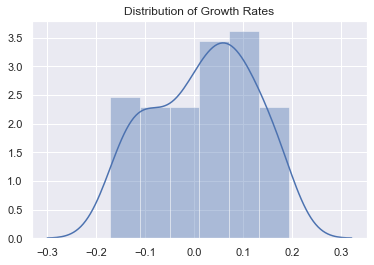

In [15]:
sns.distplot(x)
plt.title("Distribution of Growth Rates")

In [16]:
data_pars = data[data.columns[0:9]]
growth_rate_series = pd.Series(growth_rates)
data_pars["growth_rate"] = growth_rate_series

C:\Users\mfyles\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [17]:
data_pars

,hazard_rate_scale,infection_reporting_prob,contact_tracing_success_prob,contact_trace_delay_par,global_contact_reduction,two_step_tracing,prob_has_trace_app,0,1,growth_rate
0,0.815392,0.5,0.814370,1.828329,0.526473,False,0.376802,5000,5034,-0.021708
1,0.815392,0.5,0.700312,2.210773,0.256255,False,0.488790,5000,5092,0.086184
2,0.811619,0.6,0.866266,2.291236,0.768071,False,0.222099,5000,5025,-0.138241
3,0.830484,0.1,0.903227,1.789121,0.089129,False,0.003929,5000,5084,0.171897
4,0.804073,0.8,0.775432,1.863735,0.663014,True,0.369741,5000,5044,-0.136162
...,...,...,...,...,...,...,...,...,...,...
95,0.811619,0.6,0.827038,1.510402,0.398273,False,0.396969,5000,5067,-0.001378
96,0.830484,0.1,0.739063,2.399260,0.243100,True,0.062873,5000,5064,0.144702
97,0.815392,0.5,0.740041,1.762001,0.747524,False,0.289859,5000,5026,-0.114661
98,0.826711,0.2,0.811862,2.052342,0.523579,True,0.120711,5000,5058,0.033943


                            OLS Regression Results                            
Dep. Variable:            growth_rate   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.986
Method:                 Least Squares   F-statistic:                     994.3
Date:                Sun, 10 May 2020   Prob (F-statistic):           9.41e-84
Time:                        09:59:57   Log-Likelihood:                 304.41
No. Observations:                 100   AIC:                            -592.8
Df Residuals:                      92   BIC:                            -572.0
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercep

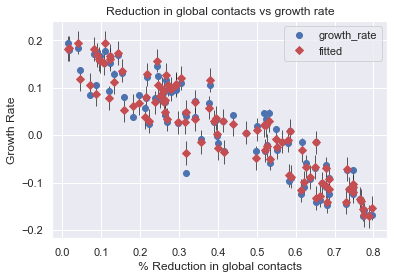

In [31]:
y, X = dmatrices('growth_rate ~ global_contact_reduction + I(global_contact_reduction**2) + I(prob_has_trace_app**2) + contact_tracing_success_prob + contact_trace_delay_par + contact_trace_delay_par + infection_reporting_prob + two_step_tracing', 
                 data = data_pars)
model_2 = sma.OLS(y, X)
res = model_2.fit()
print(res.summary())
sm.graphics.regressionplots.plot_fit(res, "global_contact_reduction")

plt.xlabel("% Reduction in global contacts")
plt.ylabel("Growth Rate")
plt.title("Reduction in global contacts vs growth rate")
plt.savefig("Figures/Simulation - no test delay/growth_rate_global_contacts.png")
plt.savefig("Figures/Simulation - no test delay/growth_rate_global_contacts.svg")

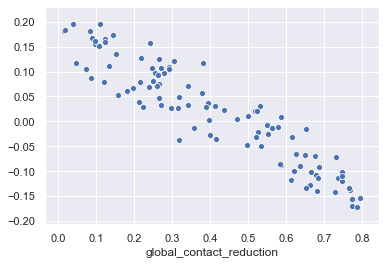

In [19]:
sns.scatterplot(data_pars["global_contact_reduction"], res.fittedvalues)

## Residuals vs Fitted Value

There doesn't appear to be any systematic deviation from our predicted value

Text(0, 0.5, 'Residual')

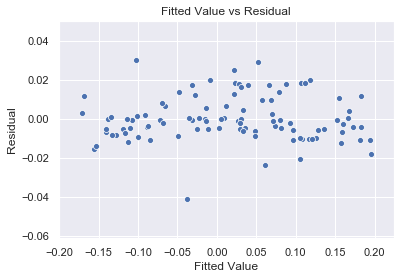

In [20]:
sns.scatterplot(res.fittedvalues, res.resid)
plt.title("Fitted Value vs Residual")
plt.xlabel("Fitted Value")
plt.ylabel("Residual")

## Residual Distribution

Text(0.5, 1.0, 'Distribution of the residuals')

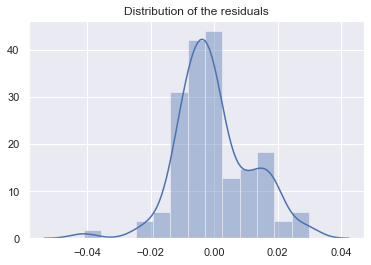

In [21]:
sns.distplot(res.resid)
plt.title("Distribution of the residuals")

Sort of normally distributed

## Normality of residuals tests

In [22]:
name = ['Jarque-Bera', 'Chi^2 two-tail prob.', 'Skew', 'Kurtosis']
test = sms.jarque_bera(res.resid)
lzip(name, test)

[('Jarque-Bera', 4.395691208302891),
 ('Chi^2 two-tail prob.', 0.11104212955355706),
 ('Skew', 0.15453581460340773),
 ('Kurtosis', 3.979510397092414)]

## Heteroskedasticity tests

We have strong heteroscedasticity in our data

In [23]:
name = ['Lagrange multiplier statistic', 'p-value',
        'f-value', 'f p-value']
test = sms.het_breuschpagan(res.resid, res.model.exog)
lzip(name, test)

[('Lagrange multiplier statistic', 14.882283171670762),
 ('p-value', 0.03753831781680964),
 ('f-value', 2.297943706353231),
 ('f p-value', 0.03329655567876402)]

## Comparison to reference distributions

In [27]:
reference_coefs = pd.read_excel("Data/Reference/OLS_coefficients.xlsx", index_col = 0)
reference_coefs

,intercept,coef_contact_reduction,coef_contact_reduction**2
0,0.213732,-0.152942,-0.289244


In [28]:
c = reference_coefs["intercept"].loc[0]
beta_0 = reference_coefs["coef_contact_reduction"].loc[0]
beta_1 = reference_coefs["coef_contact_reduction**2"].loc[0]
x = np.linspace(0, 0.8)
y = c + beta_0*x + beta_1*x**2

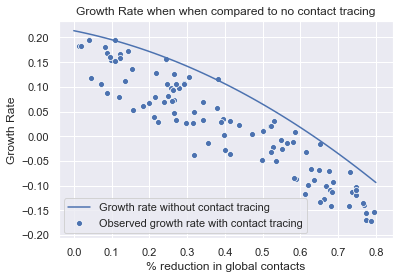

In [29]:
sns.scatterplot(data_pars["global_contact_reduction"], res.fittedvalues)
plt.plot(x, y)
plt.legend(("Growth rate without contact tracing", "Observed growth rate with contact tracing"))
plt.title("Growth Rate when when compared to no contact tracing")
plt.ylabel("Growth Rate")
plt.xlabel("% reduction in global contacts")
plt.savefig("Figures/Simulation - no test delay/growth_rate_comparison.svg")